(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7685acd46090>)

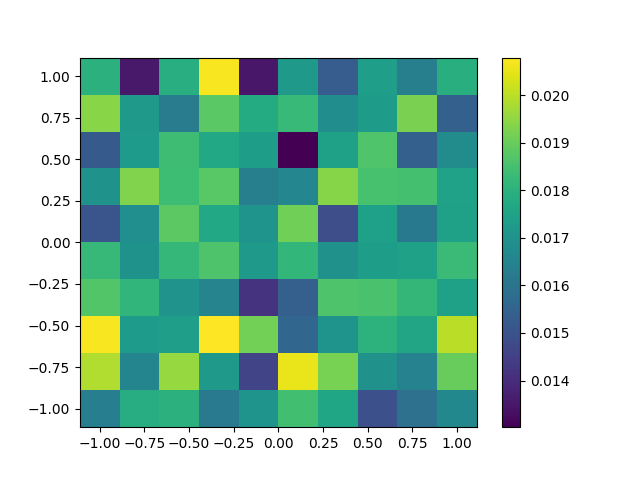

In [1]:
from bohm import *
import numpy as np
import matplotlib.pyplot as plt
from numiphy.findiffs.grids import *
import subprocess
%matplotlib widget

def playsound():
    subprocess.run(["play", "-n", "synth", "1", "sin", "1000"])  # 1 second, 1000 Hz


def lyap(orb: BohmianOrbit)->float:
    t_events = orb.t[orb.events-1]
    delq_events = orb.q[orb.events-1, 2:]
    ksi_array = np.linalg.norm(delq_events, axis=1)
    logksi = np.log(ksi_array).cumsum()
    index = logksi/t_events
    return t_events, index

def checkpoints(every, total, start=0):
    t = start+every
    res = []
    while t <= total:
        res.append(t)
        t += every
    return res

omega1 = 1
omega2 = 1/2**0.5
c2 = 1/2**0.5
a0 = 5/2
k = 2**0.5
args = (omega1, omega2, c2, a0)

grid = Uniform1D(-1, 1, 10) ** 2

q0 = [np.array(x+(1/k, 1/k), dtype=np.float64) for x in grid.coords_iterator()]

DELTA_T = 0.5
TMAX = 150000
events = checkpoints(DELTA_T, TMAX)

orbits = [BohmianOrbit(0, qi, args, 1e-5, rtol=0, atol=1e-12, checkpoints=events) for qi in q0]

integrate_all(orbits, TMAX, max_frames=0)


lyapunov = np.zeros(grid.shape)
for i in range(len(orbits)):
    lyapunov[grid.tonode(i)] = lyap(orbits[i])[1][-1]

f = InterpedArray(lyapunov, grid)
f.plot()

#g++ -O3 -Wall -march=native -shared -std=c++20 -fopenmp -I/usr/include/python3.12 -I/usr/include/pybind11 -fPIC $(python3 -m pybind11 --includes) bohm.cpp -o bohm$(python3-config --extension-suffix) -lmpfr -lgmp

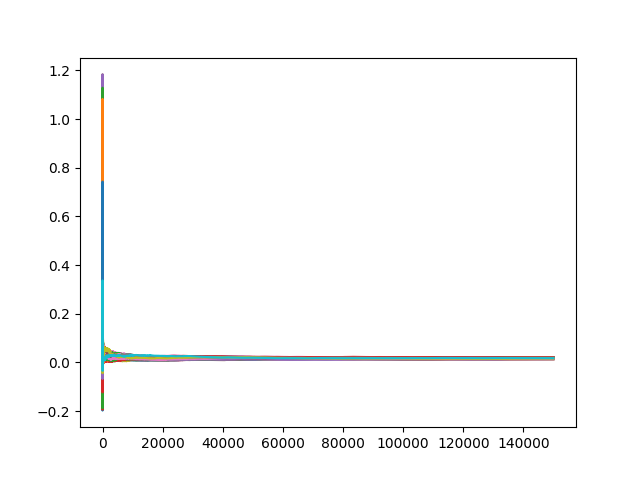

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
for i in range(grid.n):
    ax.plot(*lyap(orbits[i]))

In [5]:
orbits[0].t.size

600000

In [ ]:
lyapunov = np.zeros(grid.shape)
for i in range(len(orbits)):
    lyapunov[grid.tonode(i)] = lyap(orbits[i])[1][-1]

f = InterpedArray(lyapunov, grid)
f.plot()

NameError: name 'np' is not defined